In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from wdtools import *

In [3]:
# this can take about 9 - 11 minutes
start = time.time()
all_taxlot = combine_taxlot()
end = time.time()
print(f'it took {round((end - start)/60, 0)} minutes to complete')

it took 9.0 minutes to complete


In [7]:
setID = 'Set004'

In [5]:
nm_to_add = 2878

In [6]:
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [209]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [95]:
#ml = 'N'
ml = 'Y'

In [96]:
notes = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'review_unmatched_{setID}_r2_{ml}_0.csv'))

In [97]:
notes.wetdet_delin_number.unique()

array(['WD2018-0276', 'WD2017-0415', 'WD2021-0594', 'WD2017-0160',
       'WD2018-0139'], dtype=object)

In [10]:
notes.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 'latitude',
       'longitude', 'DecisionLink', 'record_ID', 'IDyear', 'correct_type',
       'correction', 'cor_trsqq', 'ORTaxlot'],
      dtype='object')

In [98]:
notes.shape

(5, 13)

In [107]:
notes

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,DecisionLink,record_ID,IDyear,correct_type,correction,cor_trsqq,ORTaxlot
0,WD2018-0276,01S01E18DA,ROW,Multnomah,45.481223,-122.727039,https://docs.dsl.state.or.us/PublicReview/docv...,3412,2018,lot number,"lot number ['ROADS'] might be incorrect, the m...",01S01E18DA,2601.00S01.00E18DA--0000NONTL
1,WD2017-0415,01N02E28DC,ROW,Multnomah,45.534916,-122.565683,https://docs.dsl.state.or.us/PublicReview/Elec...,3366,2017,lot number,"lot number ['ROADS'] might be incorrect, the m...",01N02E28DC,2601.00N02.00E28DC--0000NONTL
2,WD2021-0594,14S01W18,ROW,Linn,44.357473,-122.860493,https://docs.dsl.state.or.us/PublicReview/Elec...,3304,2021,section number,from 18 to 15,14S01W1500,2214.00S01.00W1500--0000ROADS
3,WD2017-0160,01S01W36DD,ROW,Multnomah,45.433827,-122.743467,https://docs.dsl.state.or.us/PublicReview/Elec...,3344,2017,to review,"there is not any matched lot, need to review t...",01S01E31CC,2601.00S01.00E31CC--000008700
4,WD2018-0139,01S01E20CB,ROW,Multnomah,45.467170,-122.720830,https://docs.dsl.state.or.us/PublicReview/Elec...,3402,2018,lot number,"lot number ['ROADS'] might be incorrect, the m...",01S01E20CB,2601.00S01.00E20CB--0000NONTL


In [133]:
i=4

In [130]:
i = i+1

In [132]:
i

5

In [134]:
notes.loc[i, ['wetdet_delin_number', 'record_ID', 'trsqq', 'correct_type', 'correction', 'cor_trsqq', 'parcel_id', 'ORTaxlot']]

wetdet_delin_number                                          WD2018-0139
record_ID                                                           3402
trsqq                                                         01S01E20CB
correct_type                                                  lot number
correction             lot number ['ROADS'] might be incorrect, the m...
cor_trsqq                                                     01S01E20CB
parcel_id                                                            ROW
ORTaxlot                                   2601.00S01.00E20CB--0000NONTL
Name: 4, dtype: object

In [126]:
print(notes.loc[i, 'correction'])

lot number ['ROADS'] might be incorrect, the matched taxlot is 2601.00S01.00E20CB--0000NONTL for 01S01E20CB


In [127]:
wdID = notes.loc[i,'wetdet_delin_number']

In [198]:
wdID

'WD2019-0156'

In [128]:
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
webbrowser.open(url)

True

<AxesSubplot:>

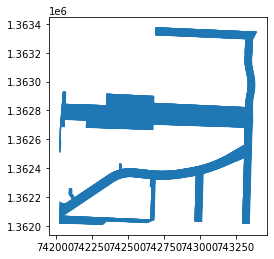

In [129]:
all_taxlot[all_taxlot.ORTaxlot==notes.loc[i,'ORTaxlot']].plot()

In [200]:
selcols = ['county', 'trsqq', 'parcel_id', 'latitude', 'longitude', 'record_ID', 'notes']
wd.loc[wd.wetdet_delin_number == wdID, selcols]

,county,trsqq,parcel_id,latitude,longitude,record_ID,notes
932,Yamhill,04S04W15CA,3100,45.222934,-123.165247,3811,


In [42]:
wd.parcel_id.values[587]

'3400'

In [143]:
ctyp = notes.loc[i,'correct_type']#.split(' and ')[1]
ctyp

'QQ'

In [85]:
ctyp = 'QQ'

In [201]:
crt = notes.loc[i,'correction']
crt

'from CA to 00'

In [202]:
ft = crt.split('from ')[1].split(' to ')
ft

['CA', '00']

In [86]:
ft = ['1N1E33AC', '01N01E33AC']

In [73]:
ft[0] = '00'

In [38]:
ft[1] = 'DB'

In [39]:
ft

['Multnomah', 'Washington']

In [517]:
f = crt.split('from ')[1].split(' and ')[0]
t = crt.split(' to ')[1].split(' and ')[0]

In [523]:
f = crt.split(' and ')[1].split(' to ')[0]
t = crt.split(' and ')[2]

In [524]:
print(f, t)

Q VE


In [203]:
rID = notes.loc[i,'record_ID']
rID

3811

In [90]:
df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'))

In [204]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [189]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': 'county', 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [67]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'parcel id', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [525]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': f, 'to': t},
        ignore_index = True)

In [597]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': 'county', 'from': 'Benton', 'to': 'Polk'},
        ignore_index = True)

In [206]:
df.tail(5)

,wetdet_delin_number,record_ID,field,cor_type,from,to
6,WD2017-0057,3334,county,county,Multnomah,Washington
7,WD2020-0568,3267,trsqq,QQ,00,B0
8,WD2018-0343,3423,county,county,Multnomah,Washington
9,WD2019-0239,3189,county,county,Linn,Benton
10,WD2021-0102,3655,county,county,Multnomah,Washington


In [207]:
df.head()

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2019-0156,3811,trsqq,QQ,CA,00
1,WD2019-0039,3499,trsqq,QQ,00,CB
2,WD2018-0462,3466,county,county,Multnomah,Washington
3,WD2021-0031,2908,trsqq,range number,14,15
4,WD2018-0321,3421,trsqq,QQ,00,D0


In [70]:
df.loc[2, 'field'] = 'parcel_id'

In [208]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'), index=False)

In [400]:
df.shape

(28, 6)

In [8]:
r1df = pd.read_csv(os.path.join(inpath + f'\\output\\to_review\\unmatched_df_{setID}_r1_N.csv'))

In [215]:
r1df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'DocumentName', 'DecisionLink', 'is_batch_file', 'status_name',
       'received_date', 'Coord-Source', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [10]:
wdIDs = r1df.wetdet_delin_number.unique()

In [91]:
wdIDs[len(wdIDs)-1]

'WD2020-0195'

In [46]:
i = 3

In [65]:
i = i + 1

In [89]:
i

5

In [ ]:
df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'))

In [66]:
r1df.loc[r1df.wetdet_delin_number == wdIDs[i], ['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 
                                                'latitude', 'longitude', 'record_ID']]

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,record_ID
27,WD2020-0195,01N02W07,"101, 901",Multnomah,45.581397,-122.600215,3579
28,WD2020-0195,01N02E17,201,Multnomah,45.576494,-122.595930,3582


In [42]:
url = r1df.loc[r1df.wetdet_delin_number == wdIDs[i], 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)

Decision link is not available


In [77]:
j=1

In [78]:
sel = r1df.wetdet_delin_number == wdIDs[i]

In [79]:
crt = review_wd_record_w_coord(wd_id=wdIDs[i], 
                         county_to_check=r1df.loc[sel, 'county'].values[j], 
                         trsqq_to_check=r1df.loc[sel, 'trsqq'].values[j], 
                         parcel_IDs_to_check=r1df.loc[sel, 'parcel_id'].values[j], 
                         lon=r1df.loc[sel, 'longitude'].values[j], 
                         lat=r1df.loc[sel, 'latitude'].values[j], 
                         taxlot=all_taxlot, 
                         year=r1df.loc[sel, 'IDyear'].values[j])
print(crt)

reviewing WD2020-0195
all lots are matched...
corrected trsqq...
('QQ', 'from 00 to B0')


In [25]:
corrected_trsqq = '03S02W16AC'

In [26]:
corrected_trsqq in trsqq

True

In [27]:
txid = create_ORTaxlot(cnt_code=cnt_dict[r1df.loc[sel, 'county'].values[0]], 
                trsqq=corrected_trsqq, 
                lot=r1df.loc[sel, 'parcel_id'].values[0])

In [29]:
txid in all_taxlot.ORTaxlot.values

True

<AxesSubplot:>

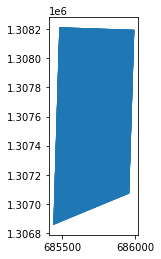

In [30]:
all_taxlot[all_taxlot.ORTaxlot==txid].plot()

In [59]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [80]:
ft = crt[1].split('from ')[1].split(' to ')
print(ft)

['00', 'B0']


In [73]:
wdIDs[i]

'WD2020-0195'

In [85]:
j = 1

In [86]:
df = df.append({'wetdet_delin_number': wdIDs[i],
                'record_ID': r1df.loc[sel, 'record_ID'].values[j],
                'field': 'trsqq', 
                'cor_type': crt[0], 
                'from': ft[0], 
                'to': ft[1]},
        ignore_index = True)

In [87]:
df

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2019-0013,3804,trsqq,township direction,N,S
1,WD2019-0013,3803,trsqq,township direction,N,S
2,WD2020-0195,3579,trsqq,range direction,W,E
3,WD2020-0195,3582,trsqq,QQ,00,B0


In [34]:
ml = 'N'

In [88]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'), index=False)